In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
#age
#sex
#chest pain type (4 values)
#resting blood pressure
#serum cholestoral in mg/dl
#fasting blood sugar > 120 mg/dl
#resting electrocardiographic results (values 0,1,2)
#maximum heart rate achieved
#exercise induced angina
#oldpeak = ST depression induced by exercise relative to rest
#the slope of the peak exercise ST segment
#number of major vessels (0-3) colored by flourosopy
#thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
data.shape

(1025, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data_dup=data.duplicated().any()
print(data_dup)

True


In [13]:
data=data.drop_duplicates()

In [14]:
data.shape

(302, 14)

In [16]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

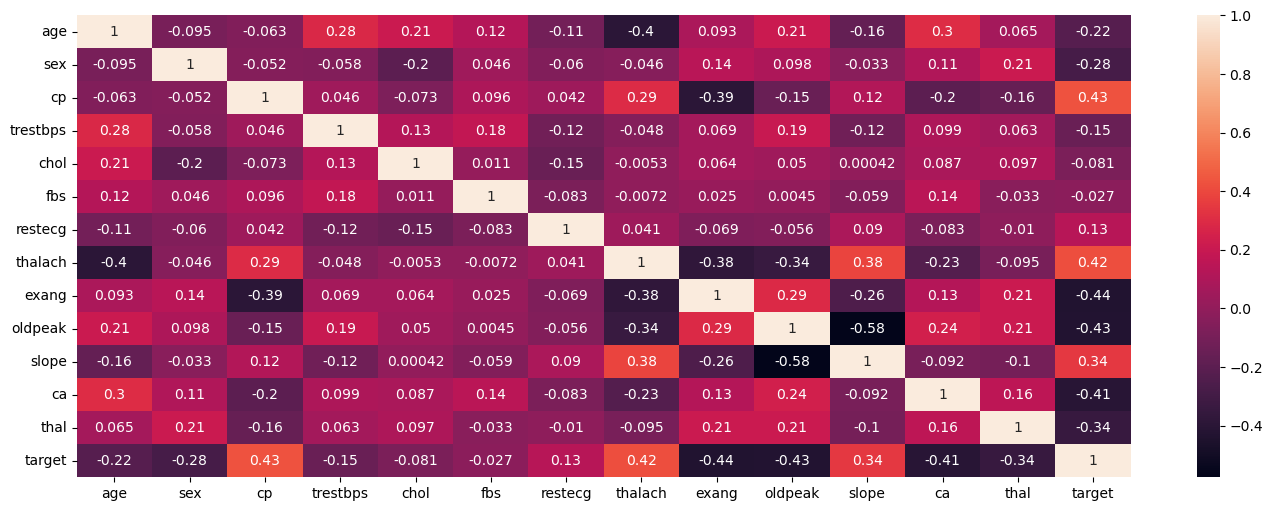

In [21]:
#Draw Correlation Matrix 
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)

In [22]:
#How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
data["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

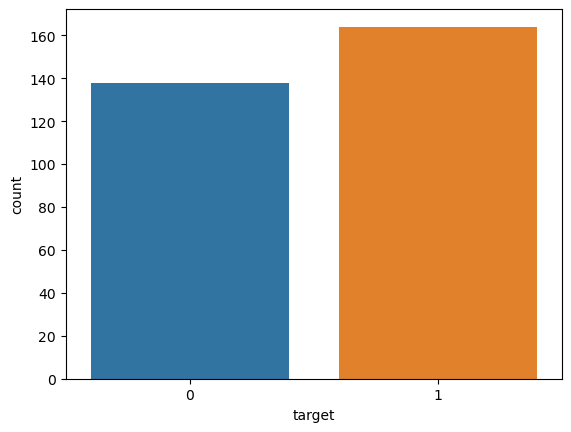

In [25]:
sns.countplot(x="target",data=data)

In [26]:
#Find Count of  Male & Female in this Dataset
data["sex"].value_counts()

1    206
0     96
Name: sex, dtype: int64

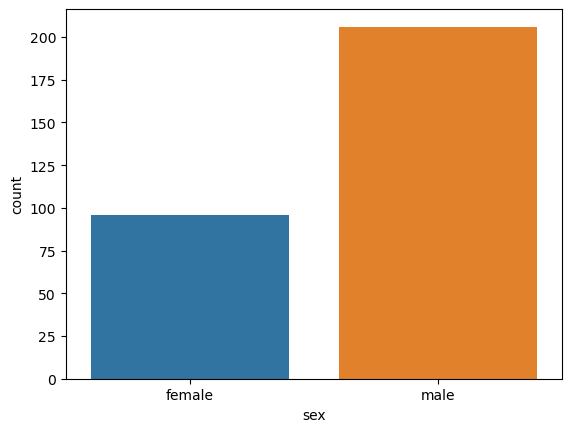

In [30]:
sns.countplot(x="sex",data=data)
plt.xticks([0,1],["female","male"])
plt.show()

In [31]:
#Find Gender Distribution According to The Target Variable
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

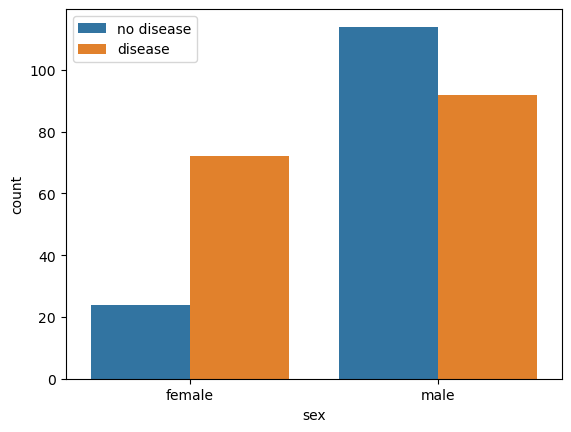

In [36]:
sns.countplot(x="sex",hue="target",data=data)
plt.xticks([0,1],['female',"male"])
plt.legend(labels=["no disease","disease"])
plt.show()

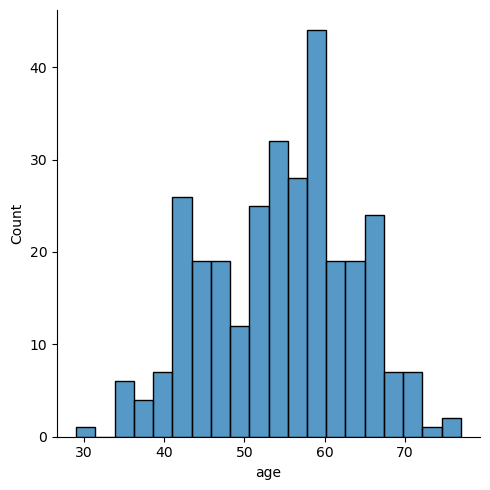

In [42]:
#Check Age Distribution In The Dataset
sns.displot(data["age"],bins=20)
plt.show()

# Check Chest Pain Type
chest pain types(4 values)
0:- typical angina
1:-atypical angina
2:- non anginal pain
3:-asymptomatic

<AxesSubplot:xlabel='cp', ylabel='count'>

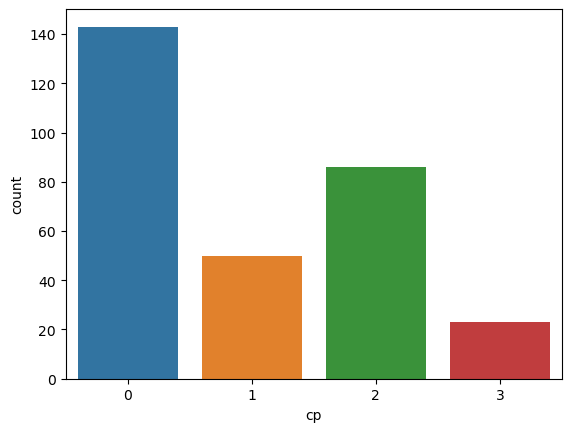

In [44]:
sns.countplot(x="cp",data=data)


In [45]:
#Show The Chest Pain Distribution As Per Target Variable
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

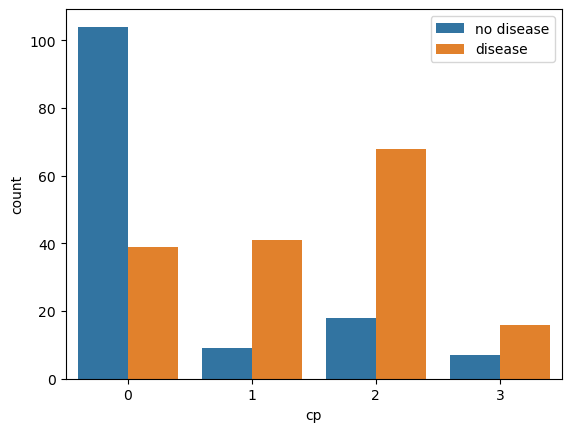

In [49]:
sns.countplot(x="cp",hue= "target",data=data)
plt.legend(labels=["no disease",'disease'])
plt.show()

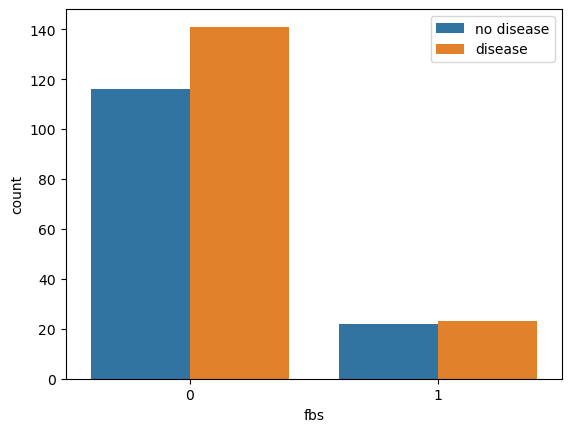

In [50]:
# Show Fasting Blood Sugar Distribution According To Target Variable
sns.countplot(x="fbs",hue= "target",data=data)
plt.legend(labels=["no disease",'disease'])
plt.show()

In [51]:
# Check Resting Blood Pressure Distribution
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:>

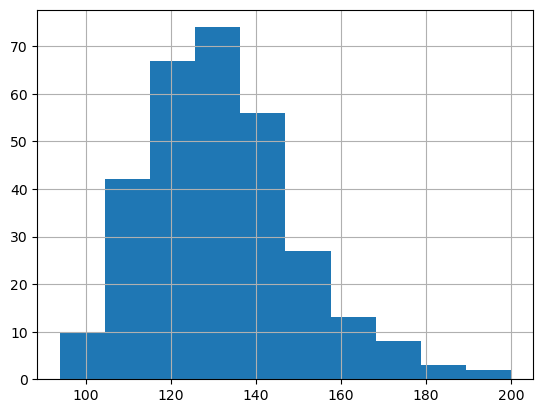

In [52]:
data["trestbps"].hist()

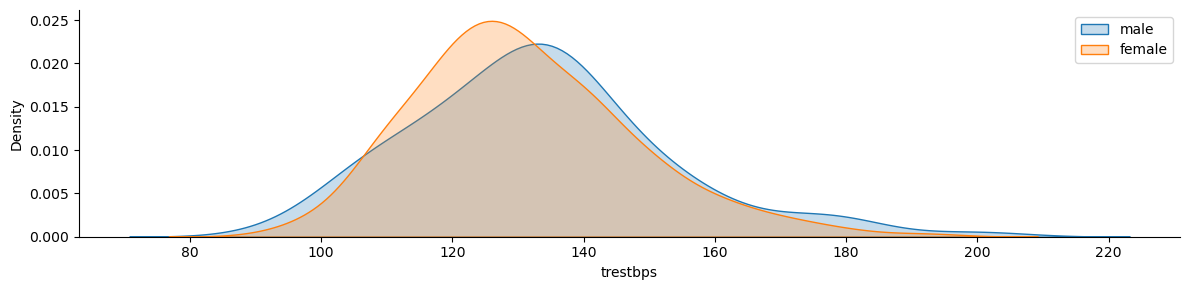

In [54]:
#Compare Resting Blood Pressure As Per Sex Column
g=sns.FacetGrid(data,hue="sex",aspect=4)
g.map(sns.kdeplot,"trestbps",shade=True)
plt.legend(labels=["male","female"])

<AxesSubplot:>

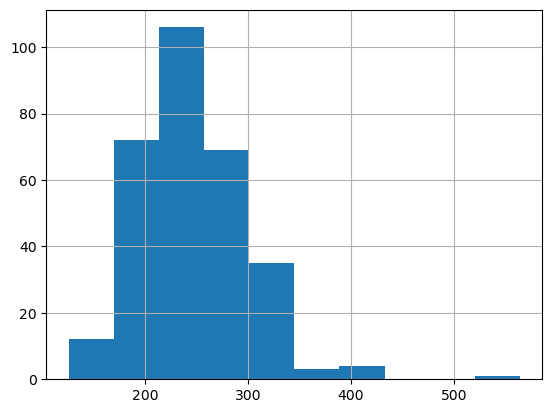

In [56]:
#Show Distribution of Serum cholesterol
data["chol"].hist()